<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/constantfinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import numpy as np 
import csv
import os 
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

#!pip install unrar 

In [0]:
!unrar e '/content/drive/My Drive/data.rar'

#rar = rarfile.RarFile('/content/drive/My Drive/data.rar')


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/data.rar


Would you like to replace the existing file 1.jpg
1164390 bytes, modified on 2019-07-23 17:53
with a new one
1164390 bytes, modified on 2019-07-23 17:53

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
im_ohaze = []
im_our =[]

source = os.listdir('/content/')
for file in source:
  if(file.endswith('.jpg')):
    if 'outdoor' in file:
      im_ohaze.append(file)
    else:
      im_our.append(file)

In [0]:
print(len(im_ohaze))

46


In [0]:
for im in im_ohaze:
  print(im)

10_outdoor_GT.jpg
37_outdoor_GT.jpg
35_outdoor_hazy.jpg
18_outdoor_GT.jpg
24_outdoor_hazy.jpg
04_outdoor_hazy.jpg
19_outdoor_hazy.jpg
44_outdoor_GT.jpg
19_outdoor_GT.jpg
04_outdoor_GT.jpg
34_outdoor_GT.jpg
14_outdoor_GT.jpg
05_outdoor_hazy.jpg
13_outdoor_GT.jpg
42_outdoor_hazy.jpg
40_outdoor_hazy.jpg
01_outdoor_hazy.jpg
40_outdoor_GT.jpg
08_outdoor_hazy.jpg
16_outdoor_GT.jpg
07_outdoor_GT.jpg
30_outdoor_GT.jpg
14_outdoor_hazy.jpg
38_outdoor_GT.jpg
31_outdoor_hazy.jpg
37_outdoor_hazy.jpg
31_outdoor_GT.jpg
12_outdoor_hazy.jpg
25_outdoor_GT.jpg
17_outdoor_hazy.jpg
34_outdoor_hazy.jpg
23_outdoor_hazy.jpg
43_outdoor_GT.jpg
30_outdoor_hazy.jpg
28_outdoor_hazy.jpg
11_outdoor_GT.jpg
23_outdoor_GT.jpg
28_outdoor_GT.jpg
25_outdoor_hazy.jpg
20_outdoor_hazy.jpg
13_outdoor_hazy.jpg
01_outdoor_GT.jpg
39_outdoor_hazy.jpg
45_outdoor_hazy.jpg
42_outdoor_GT.jpg
10_outdoor_hazy.jpg


In [0]:
our_img_label=[]
with open('/content/our_img_new.csv') as file:
  reader = csv.reader(file, delimiter = ',')
  for row in reader:
    l=[]
    l.append(row[0])
    l.append(row[1])
    our_img_label.append(l)

In [0]:
print(our_img_label)

[['1', '0'], ['2', '0'], ['3', '1'], ['4', '1'], ['5', '0'], ['6', '0'], ['7', '1'], ['8', '0'], ['9', '0'], ['10', '0'], ['11', '1'], ['12', '1'], ['13', '0'], ['14', '0'], ['15', '0'], ['16', '1'], ['17', '0'], ['18', '0'], ['19', '0'], ['20', '0'], ['21', '0'], ['22', '1'], ['23', '0'], ['24', '0'], ['25', '0'], ['26', '0'], ['27', '0']]


In [0]:
im_our.sort()
temp=[]


final_our={}

for i in our_img_label:
  for im in im_our:
    if(i[0]==im[:-4]):   
      final_our[im]=i[1]
     

In [0]:
print(final_our)

{'1.jpg': '0', '2.jpg': '0', '3.jpg': '1', '4.jpg': '1', '5.jpg': '0', '6.jpg': '0', '7.jpg': '1', '8.jpg': '0', '9.jpg': '0', '10.jpg': '0', '11.jpg': '1', '12.jpg': '1', '13.jpg': '0', '14.jpg': '0', '15.jpg': '0', '16.jpg': '1', '17.jpg': '0', '18.jpg': '0', '19.jpg': '0', '20.jpg': '0', '21.jpg': '0', '22.jpg': '1', '23.jpg': '0', '24.jpg': '0', '25.jpg': '0', '26.jpg': '0', '27.jpg': '0'}


In [0]:
for im in im_ohaze:
  if 'GT' in im:
    print(im[0:3]+im[-6:-4])

  else:
    print(im[0:2] + im[-9:-4])


10_GT
37_GT
35_hazy
18_GT
24_hazy
04_hazy
19_hazy
44_GT
19_GT
04_GT
34_GT
14_GT
05_hazy
13_GT
42_hazy
40_hazy
01_hazy
40_GT
08_hazy
16_GT
07_GT
30_GT
14_hazy
38_GT
31_hazy
37_hazy
31_GT
12_hazy
25_GT
17_hazy
34_hazy
23_hazy
43_GT
30_hazy
28_hazy
11_GT
23_GT
28_GT
25_hazy
20_hazy
13_hazy
01_GT
39_hazy
45_hazy
42_GT
10_hazy


In [0]:
ohaze=[]
with open('/content/OHAZE_LABELS_NEW.csv') as file:
  reader = csv.reader(file)
  for row in reader:
    l=[]
    l.append(row[0])
    l.append(row[1])
    ohaze.append(l)

In [0]:
ohaze_labels={}

for i in ohaze:
  for im in im_ohaze:
    if 'GT' in im:
      if(im[0:3]+im[-6:-4])==i[0]:
        ohaze_labels[im]=i[1]
    elif(im[0:2] + im[-9:-4])==i[0]:
        ohaze_labels[im]=i[1]


In [0]:
print(len(ohaze_labels))

26


In [0]:
#Reading shanghai and Beijing files 

temp=[]

s = os.listdir('/content/drive/My Drive/Omega/Images/shanghai haze/')
for file in s:
  temp.append('/content/drive/My Drive/Omega/Images/shanghai haze/' + file)
  

newt=[]

s = os.listdir('/content/drive/My Drive/Omega/Images/Beijing/')
for file in s:
  newt.append('/content/drive/My Drive/Omega/Images/Beijing/' + file)

In [0]:

newt.sort()
beijing=newt

In [0]:
print(beijing)

['/content/drive/My Drive/Omega/Images/Beijing/2014_01_06_0728.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_01_16_0716.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_11_0700.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_12_0701.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_17_0710.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_24_0701.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_25_0701.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_27_0701.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_01_0700.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_02_0701.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_14_0641.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_18_0653.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_19_0644.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2014_05_14_0617.jpg', '/content/drive/My Drive/Omega/Images/Beijing/2

In [0]:

i=0
beijing_labels={}

with open('/content/beijing_labels.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    beijing_labels[beijing[i]]=row[0]
    i+=1
    

In [0]:
print(beijing_labels)

{'/content/drive/My Drive/Omega/Images/Beijing/2014_01_06_0728.jpg': '2', '/content/drive/My Drive/Omega/Images/Beijing/2014_01_16_0716.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_11_0700.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_12_0701.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_17_0710.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_24_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_25_0701.jpg': '2', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_27_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_01_0700.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_02_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_14_0641.jpg': '3', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_18_0653.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_19_0644.jpg': '1', '/content/drive/My Drive/Omega/Images/Beijing/2014

In [0]:
shanghai_labels=[]

temp.sort()
shanghai=temp

In [0]:



print(shanghai)

['/content/drive/My Drive/Omega/Images/shanghai haze/201405181130.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201405271215.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201406071345.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201406171415.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201406211415.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201406261545.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201406271245.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407051015.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407091145.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407101545.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407141315.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407191015.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407211015.jpg', '/content/drive/My Drive/Omega/Images/shanghai haze/201407221245.jpg', '/con

In [0]:

shanghai_labels={}
i=0
with open('/content/shanghai_labels.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    shanghai_labels[shanghai[i]]=row[0]
    i+=1


In [0]:
print(shanghai_labels)

{'/content/drive/My Drive/Omega/Images/shanghai haze/201405181130.jpg': '5', '/content/drive/My Drive/Omega/Images/shanghai haze/201405271215.jpg': '2', '/content/drive/My Drive/Omega/Images/shanghai haze/201406071345.jpg': '3', '/content/drive/My Drive/Omega/Images/shanghai haze/201406171415.jpg': '4', '/content/drive/My Drive/Omega/Images/shanghai haze/201406211415.jpg': '4', '/content/drive/My Drive/Omega/Images/shanghai haze/201406261545.jpg': '5', '/content/drive/My Drive/Omega/Images/shanghai haze/201406271245.jpg': '3', '/content/drive/My Drive/Omega/Images/shanghai haze/201407051015.jpg': '4', '/content/drive/My Drive/Omega/Images/shanghai haze/201407091145.jpg': '1', '/content/drive/My Drive/Omega/Images/shanghai haze/201407101545.jpg': '4', '/content/drive/My Drive/Omega/Images/shanghai haze/201407141315.jpg': '3', '/content/drive/My Drive/Omega/Images/shanghai haze/201407191015.jpg': '2', '/content/drive/My Drive/Omega/Images/shanghai haze/201407211015.jpg': '2', '/content/d

In [0]:

print(beijing_labels)
print(shanghai_labels)
print(ohaze_labels)
print(final_our)

{'/content/drive/My Drive/Omega/Images/Beijing/2014_01_06_0728.jpg': '2', '/content/drive/My Drive/Omega/Images/Beijing/2014_01_16_0716.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_11_0700.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_12_0701.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_17_0710.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_24_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_25_0701.jpg': '2', '/content/drive/My Drive/Omega/Images/Beijing/2014_03_27_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_01_0700.jpg': '4', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_02_0701.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_14_0641.jpg': '3', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_18_0653.jpg': '0', '/content/drive/My Drive/Omega/Images/Beijing/2014_04_19_0644.jpg': '1', '/content/drive/My Drive/Omega/Images/Beijing/2014

In [0]:

images =[]
for key in beijing_labels:
  images.append(key)
for key in shanghai_labels:
  images.append(key)
for key in ohaze_labels:
  images.append(key)
for key in final_our:
  images.append(key)
  

In [0]:

labels =[]
for key in beijing_labels:
  labels.append(beijing_labels[key])
for key in shanghai_labels:
  labels.append(shanghai_labels[key])
for key in ohaze_labels:
  labels.append(ohaze_labels[key])
for key in final_our:
  labels.append(final_our[key])
  

In [0]:
omega = []
for l in labels:
  if(l == '0'):
    omega.append(0.1)
  elif(l == '1'):
    omega.append(0.3)
  elif(l == '2'):
    omega.append(0.5)
  elif(l == '3'):
    omega.append(0.7)
  elif(l == '4'):
    omega.append(0.8)
  elif(l == '5'):
    omega.append(0.9)

In [0]:
ctr=0

x2_l=[]
x1_l=[]


for img in images:
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  B=np.zeros((256,256))
  D=np.zeros((256,256))
  C=np.zeros((256,256))
  # 3rd channel or im[2] has been split as b,g,r 

  b,g,r = cv2.split(im)

  ctr+=1
  for i in range(b.shape[0]):
    for j in range(b.shape[1]):
      D[i][j] = min(b[i][j], g[i][j], r[i][j])
      B[i][j] = max(b[i][j], g[i][j], r[i][j])
      C[i][j] = B[i][j] - D[i][j]

  d = np.sum(D)/float(np.size(D))
  b = np.sum(B)/float(np.size(B))
  c = b-d 
  A = (0.33)*max(np.ndarray.flatten(B)) + (0.66)*b
  
  x1_l.append((A - d)/float(A)) 
  x2_l.append(c/float(A)) 
  print(ctr)

In [0]:
print(len(x1_l))
print(len(x2_l))

191
191


In [0]:
x1_train=x1_l[:130]
x1_train = np.resize(x1_train, (130,1))
x2_train=x2_l[:130]
x2_train = np.resize(x2_train, (130,1))

x1_test=x1_l[130:]
x1_test = np.resize(x1_test, (130,1))
x2_test=x2_l[130:]
x2_test = np.resize(x2_test, (130,1))

y_train=omega[:130]
y_train = np.resize(y_train, (130,1))
y_test=omega[130:]
y_test = np.resize(y_test, (130,1))

In [0]:

x1=tf.placeholder(dtype = tf.float32, shape = (None,1))
x2=tf.placeholder(dtype = tf.float32, shape= (None,1))
w=tf.placeholder(dtype = tf.float32, shape= (None,1))

train =[]
val =[]
u =tf.Variable(5.1)
v =tf.Variable(2.9)
s =tf.Variable(0.2461)
h = tf.math.exp(-0.5*(u*x1 + v*x2)+s)

loss = tf.reduce_mean(tf.square(tf.subtract(w,h)), name = 'loss')
opt = tf.train.AdamOptimizer(learning_rate = 0.001)
train_op = opt.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(35000):
    z = sess.run([loss,train_op, u, v, s],feed_dict={x1 :x1_train,x2 : x2_train, w : y_train })
    z_val = sess.run([loss, u,v,s], feed_dict = {x1 : x1_test, x2 : x2_test, w : y_test})
    

In [0]:
print(z[0])
print(z[2])
print(z[3])
print(z[4])

0.050826523
12.25592
-9.196996
0.32244098


28.937319
29.054438
-0.6683243

In [0]:
print(np.shape(x1_test)[0])

130


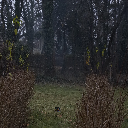

pred           0.046201781991532694
actual         [0.3]


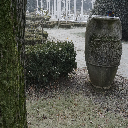

pred           0.12067881364641543
actual         [0.3]


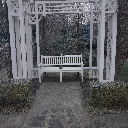

pred           0.17440543825745158
actual         [0.3]


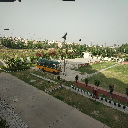

pred           0.2889952356929598
actual         [0.1]


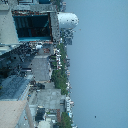

pred           0.3050868980532984
actual         [0.1]


In [56]:
u = 12.25592
v = -9.196996
s = 0.32244098

import math

i=0
k=0 
for img in images[130:]:
  im = cv2.imread(img)
  im = cv2.resize(im, (128,128))
  k+=1
  if(k%11==0):
    cv2_imshow(im)
    x1=x1_test[i]
    x2=x2_test[i]
    w = math.exp(-0.5*(u*x1 + v*x2)+s)
    print('pred           ' + str(w))
    print('actual         ' + str(y_test[i]))
  i+=1  
